# Clustering Algorithms Comparison on IBM HR Data

#### Compared Algorithms:
    * K-Means Clustering
    * Agglomerative Clustering
    * DBSCAN Clustering
    * Mean-Shift Clustering
    * BIRCH Clustering
    * Affinity Propagation
    * Mini-batch k-means
    * Spectral Clustering
    
## Objective
   _Clustering aims to maximize intra-cluster similarity and minimize inter-cluster similarity._

    Each clustering problems requires own unique solutions. According to my observation, most of tutorials and guidebooks focus on K-means clustering and the data preparation process before. I want to introduce other clustering algorithms and  to inform when do we need other algorithms. 
    
## Data
   Due to more practical explanation, I am going to use
   [IBM HR Analytics Employee Attrition & Performance Dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

## Review of the Data

In [135]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\arda\anaconda3\lib\site-packages (0.24.0)


In [136]:
import sklearn
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [137]:
data = pd.read_csv(r'C:\Users\Arda\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [138]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Missing Value Check

In [139]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Descriptive Statistics of Data

In [177]:
data.describe()



,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Encoded,Department_Encoded,EducationField_Encoded,Gender_Encoded,JobRole_Encoded,MaritalStatus_Encoded,OverTime_Encoded,Attrition_Binary
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.0,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,...,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,36.337159,803.802726,9.241750,2.900287,1.0,1026.103300,2.720230,65.973458,2.730273,1.947633,...,1.831420,3.879484,1.606887,1.263989,2.247489,0.599713,4.505022,1.106887,0.286944,0.167145
std,8.895079,402.718076,8.067533,1.018543,0.0,603.468113,1.092587,20.309310,0.710188,0.993582,...,2.650412,3.366546,0.665299,0.526983,1.333649,0.490132,2.485343,0.731348,0.452498,0.373239
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,467.250000,2.000000,2.000000,1.0,492.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,35.000000,804.500000,7.000000,3.000000,1.0,1017.500000,3.000000,66.000000,3.000000,2.000000,...,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,0.000000,0.000000
75%,42.000000,1157.000000,14.000000,4.000000,1.0,1559.500000,4.000000,84.000000,3.000000,2.000000,...,2.000000,7.000000,2.000000,2.000000,3.000000,1.000000,7.000000,2.000000,1.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,15.000000,17.000000,2.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000,1.000000


### Univariate Variable Analysis: Numerical Data

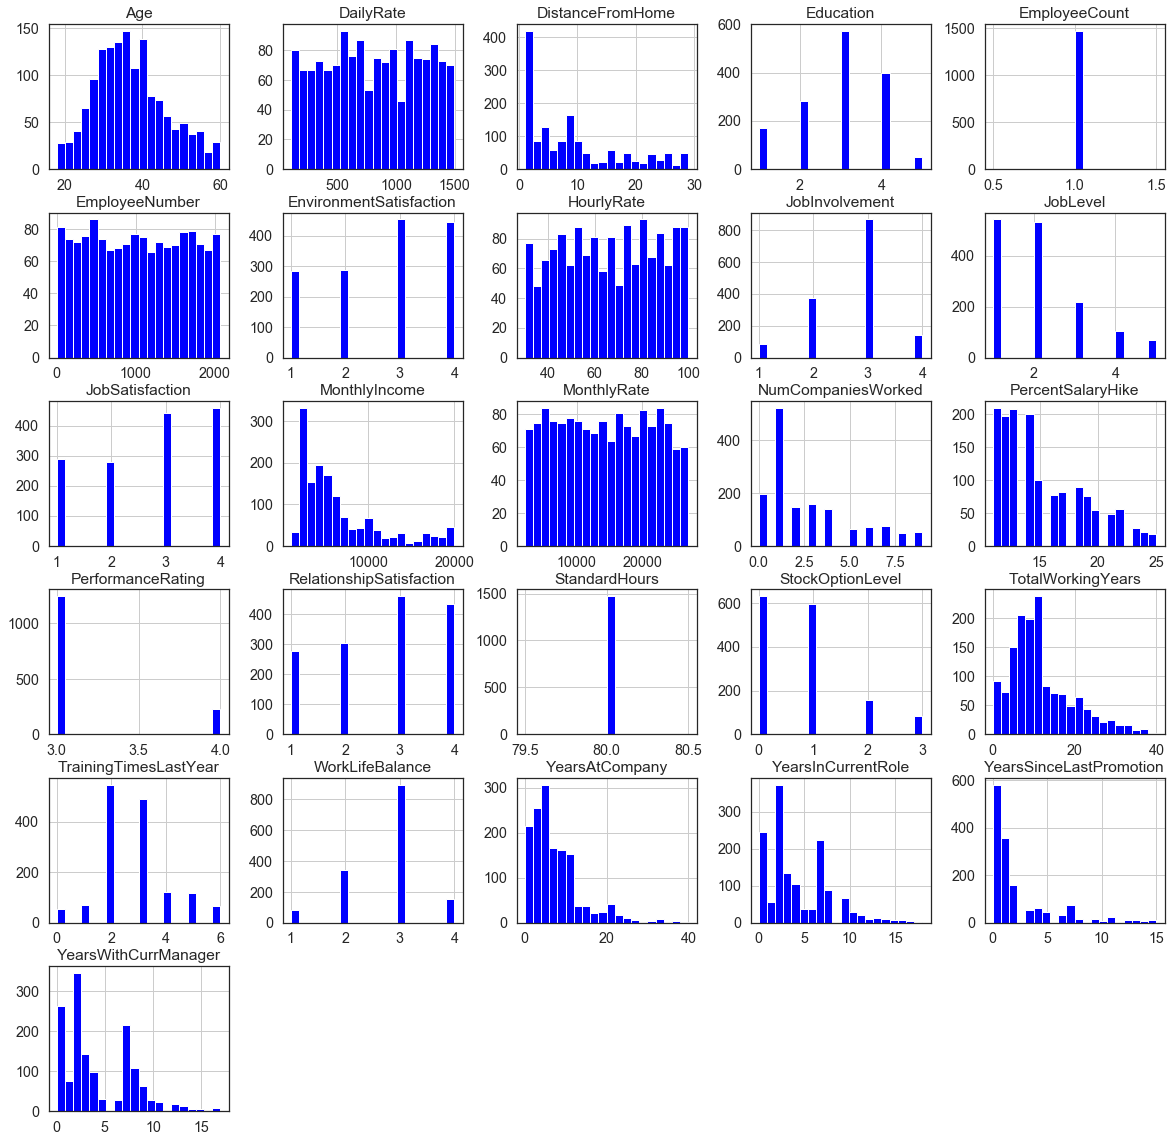

In [141]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='blue')

### Univariate Variable Analysis: Categorical Data

In [142]:
def bar_plot(variable):
    
    var = data[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation='vertical')
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

#### Attrition

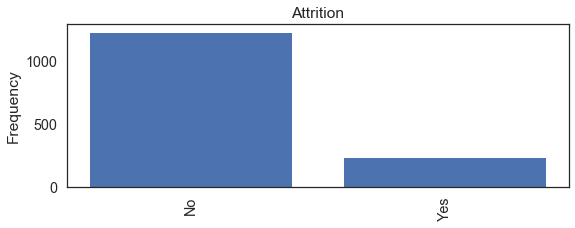

Attrition: 
 No     1233
Yes     237
Name: Attrition, dtype: int64


In [143]:
category_attrition = ['Attrition']

for c in category_attrition:
    bar_plot(c)

#### Business Travel

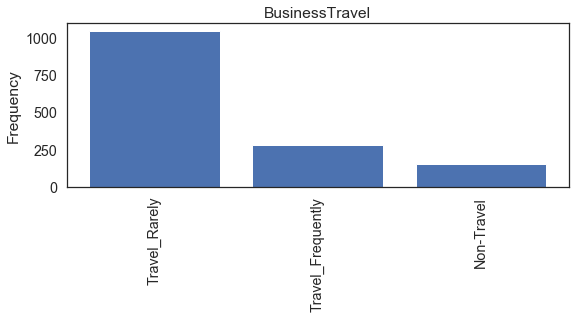

BusinessTravel: 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [144]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data['BusinessTravel_Encoded'] = ord_enc.fit_transform(data[['BusinessTravel']])

### TRAVEL RARELY = 2
### TRAVEL FREQUENTLY = 1
### NON-TRAVEL = 0

category_businesstravel = ['BusinessTravel']

for c in category_businesstravel:
    bar_plot(c)

#### Department

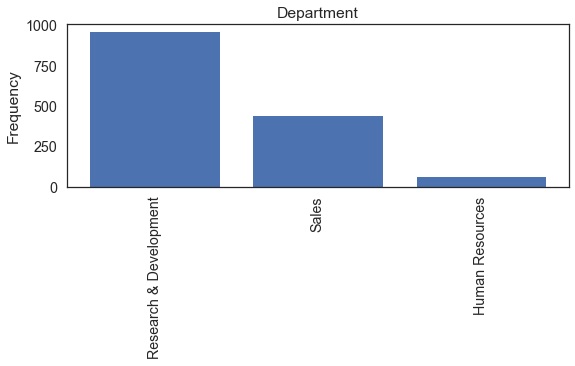

Department: 
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [145]:
data['Department_Encoded'] = ord_enc.fit_transform(data[['Department']])

category_department = ['Department']

### SALES = 2
### RESEARCH = 1
### HR = 0

for c in category_department:
    bar_plot(c)

#### Education Field

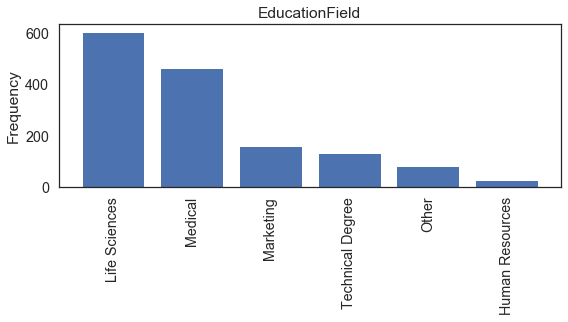

EducationField: 
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [146]:

data['EducationField_Encoded'] = ord_enc.fit_transform(data[['EducationField']])

### TECHNICAL DEGREE = 5
### OTHER = 4
### MEDICAL = 3
### MARKETING = 2
### LIFE SCIENCES = 1
### HR = 0

category_education = ['EducationField']

for c in category_education:
    bar_plot(c)

#### Gender

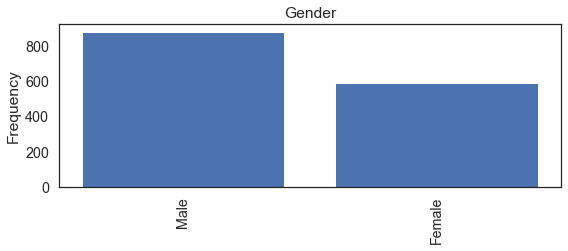

Gender: 
 Male      882
Female    588
Name: Gender, dtype: int64


In [147]:
data['Gender_Encoded'] = ord_enc.fit_transform(data[['Gender']])

### MALE = 1
### FEMALE = 0

category_gender = ['Gender']

for c in category_gender:
    bar_plot(c)

#### Job Role

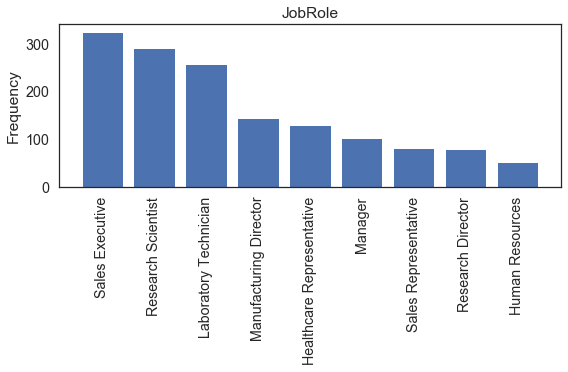

JobRole: 
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [148]:
data['JobRole_Encoded'] = ord_enc.fit_transform(data[['JobRole']])

### SALES REPRESENTATIVE = 8
### SALES EXECUTIVE = 7
### RESEARCH SCIENTIST = 6
### RESEARCH DIRECTOR = 5
### MANUFACTORING DIRECTOR = 4
### MANAGER = 3
### LABRATORY TECHNICAN = 2
### HR = 1
### HEALTHCARE REPRESANTATIVE = 0

category_jobrole = ['JobRole']

for c in category_jobrole:
    bar_plot(c)

#### Marital Status

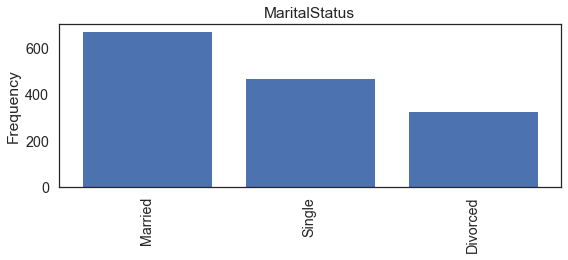

MaritalStatus: 
 Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [149]:
data['MaritalStatus_Encoded'] = ord_enc.fit_transform(data[['MaritalStatus']])


### SINGLE = 2
### MARRIED = 1
### DIVORCED = 0

category_maritalstatus = ['MaritalStatus']

for c in category_maritalstatus:
    bar_plot(c)

#### Over Time

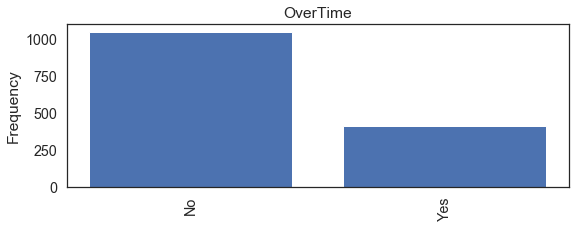

OverTime: 
 No     1054
Yes     416
Name: OverTime, dtype: int64


In [150]:
data['OverTime_Encoded'] = ord_enc.fit_transform(data[['OverTime']])

### YES = 1
### NO = 0

category_overtime = ['OverTime']

for c in category_overtime:
    bar_plot(c)

### Basic Data Analysis: Categorical Data
    * Over Time - Attrition
    * Job Role - Attrition
    * Marital Status - Attrition

In [163]:
data['Attrition_Binary'] = ord_enc.fit_transform(data[['Attrition']])

#data[['Attrition_Binary','Attrition']].head(10)
# 1 = YES
# 0 = NO

data[['OverTime','Attrition_Binary']].groupby(['OverTime'], as_index = False).mean().sort_values(by='Attrition_Binary',ascending=False)


,OverTime,Attrition_Binary
1,Yes,0.305288
0,No,0.104364


In [164]:
data[['JobRole','Attrition_Binary']].groupby(['JobRole'], as_index = False).mean().sort_values(by='Attrition_Binary',ascending=False)


,JobRole,Attrition_Binary
8,Sales Representative,0.397590
2,Laboratory Technician,0.239382
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959
4,Manufacturing Director,0.068966
0,Healthcare Representative,0.068702
3,Manager,0.049020
5,Research Director,0.025000


In [165]:
data[['MaritalStatus','Attrition_Binary']].groupby(['MaritalStatus'], as_index = False).mean().sort_values(by='Attrition_Binary',ascending=False)

,MaritalStatus,Attrition_Binary
2,Single,0.255319
1,Married,0.124814
0,Divorced,0.100917


### Outlier Detection

In [166]:
def detect_outliers(df,features):
    
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        
        Q3 = np.percentile(df[c],75)
        
        IQR = Q3 - Q1
        
        outlier_step = IQR * 1.5
        
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [167]:
data.loc[detect_outliers(data,['Age','DailyRate','DistanceFromHome','EmployeeNumber','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Encoded,Department_Encoded,EducationField_Encoded,Gender_Encoded,JobRole_Encoded,MaritalStatus_Encoded,OverTime_Encoded,Attrition_Binary
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,15,8,2.0,1.0,5.0,0.0,5.0,1.0,0.0,1.0
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,...,13,8,2.0,1.0,3.0,0.0,5.0,0.0,1.0,0.0
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,140,...,2,2,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0
123,51,No,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,...,15,15,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0
186,40,No,Travel_Rarely,989,Research & Development,4,1,Medical,1,253,...,9,9,2.0,1.0,3.0,0.0,3.0,1.0,0.0,0.0
187,55,No,Travel_Rarely,692,Research & Development,14,4,Medical,1,254,...,2,15,2.0,1.0,3.0,1.0,5.0,2.0,0.0,0.0
190,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,...,11,9,2.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0
194,45,No,Non-Travel,1195,Research & Development,2,2,Medical,1,264,...,11,8,0.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0
231,42,No,Travel_Rarely,532,Research & Development,4,2,Technical Degree,1,319,...,11,15,2.0,1.0,5.0,1.0,3.0,1.0,0.0,0.0
237,52,No,Non-Travel,771,Sales,2,4,Life Sciences,1,329,...,15,12,0.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0


In [168]:
data = data.drop(detect_outliers(data,['Age','DailyRate','DistanceFromHome','EmployeeNumber','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']),axis = 0).reset_index(drop = True)

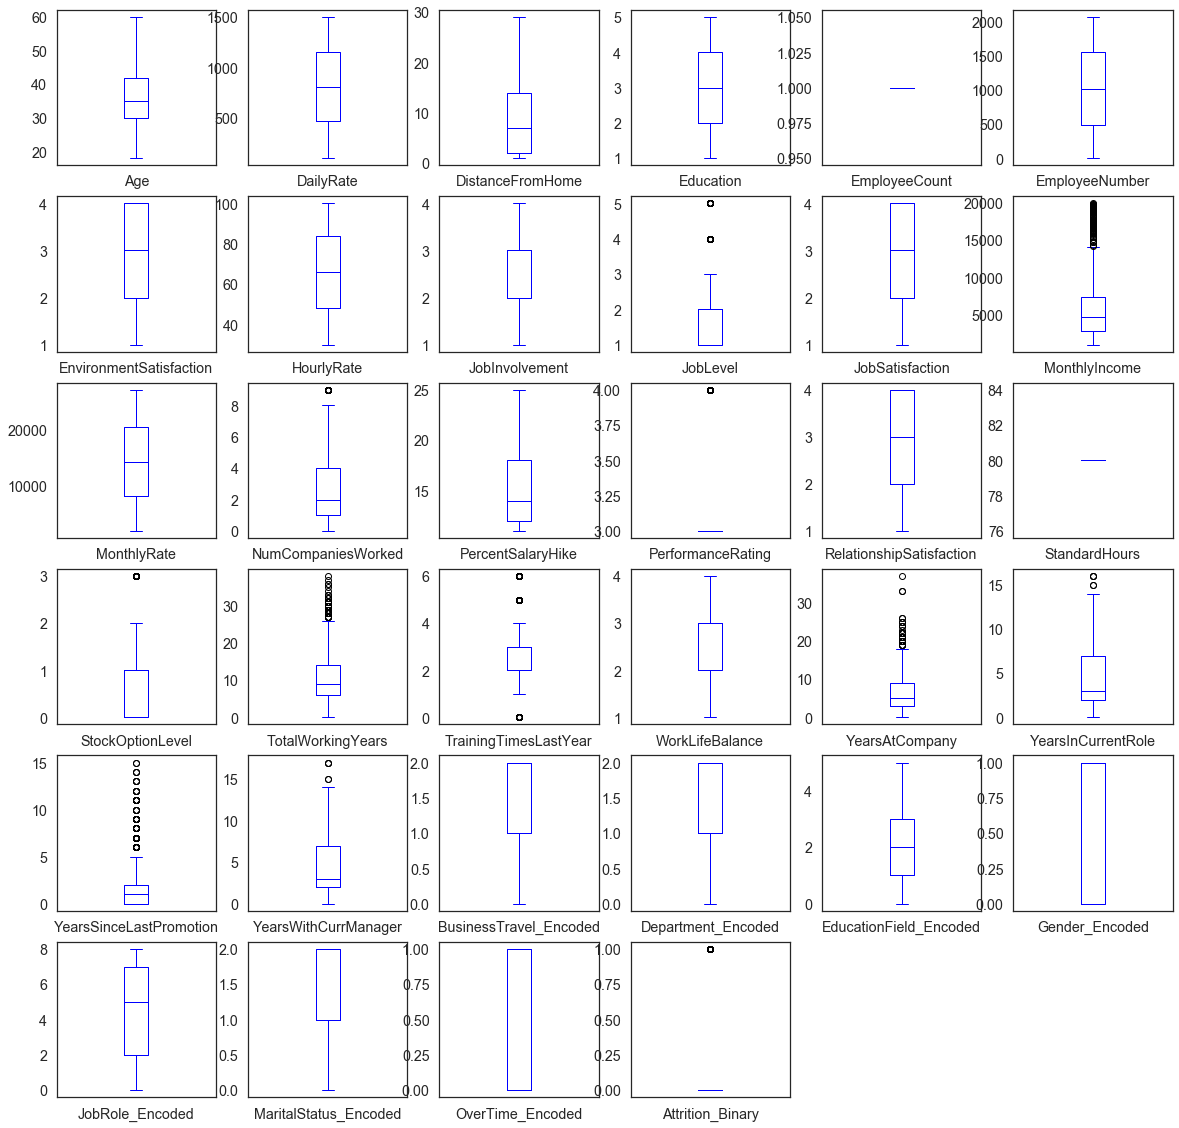

In [169]:
data.plot( kind = 'box', subplots = True, layout = (6,6), sharex = False, sharey = False,color='blue')
plt.show()

### Correlation Matrix With Categorical Data

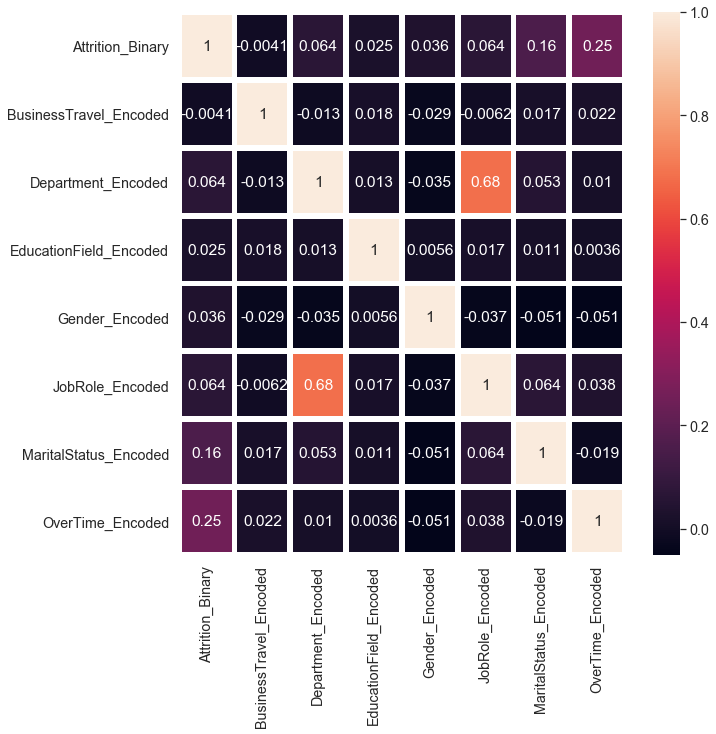

In [175]:
encoded_data_features = data[['Attrition_Binary','BusinessTravel_Encoded','Department_Encoded','EducationField_Encoded','Gender_Encoded','JobRole_Encoded','MaritalStatus_Encoded','OverTime_Encoded']]

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data_features.corr(),annot=True, linewidths=5, ax=ax)
plt.show()

##### According to correlation matrix above, there is meaningful relationship between attrition and over time.


### Correlation Matrix With Numerical Data

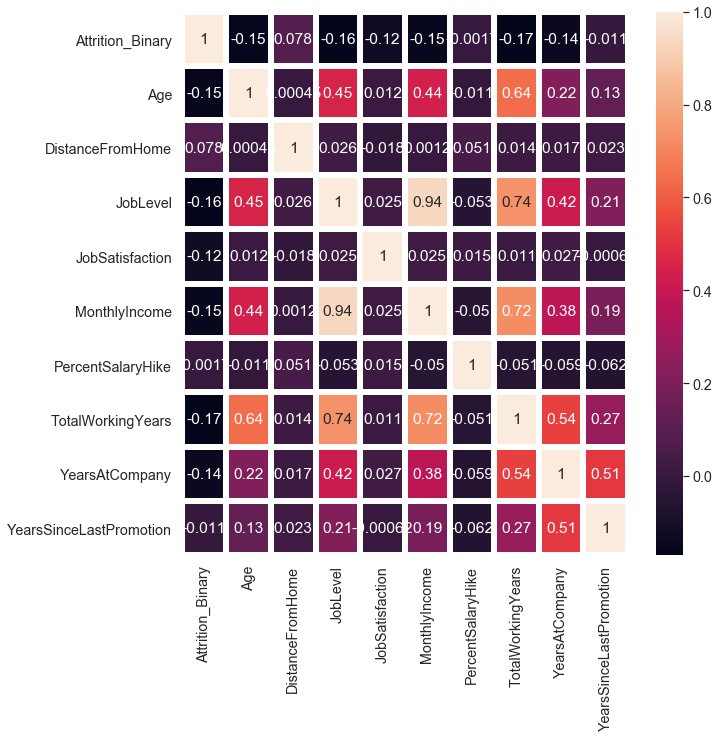

In [176]:
numerical_data_features = data[['Attrition_Binary','Age','DistanceFromHome','JobLevel','JobSatisfaction','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion']]

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(numerical_data_features.corr(),annot=True, linewidths=5, ax=ax)
plt.show()

##### According to correlation matrix above, income, age and job level negatively correlated with attrition.

#### As a result of data analysis above, I decided to move on with " Over Time, Monthly Income, Total Working Years " features in my dataset.

## Clustering Algorithms
### 1) Centroid Based
        Cluster represented by central reference vector which may not be a part of the original data e.g k-means clustering
        
        * K-means Clustering
### 2) Hierarchical 
        Connectivity based clustering based on the core idea that points are connected to points close by rather than 
        further away. A cluster can be defined largely by the maximum distance needed to connect different parts of the
        cluster. Algorithms do not partition the dataset but instead construct a tree of points which are typically 
        merged together.
        
        * Agglomerative Clustering
        * BIRCH Clustering
### 3) Distribution Based
        Built on statistical distribution models - objects of a cluster are the ones which belong likely to same 
        distribution. Tend to be complex clustering models which might be prone to overfitting on data points
        
        * Gausssian mixture models
### 4) Density Based
        Create clusters from areas which have a higher density of data points. Objects in sparse areas, which seperate 
        clusters, are considered noise and border points.
        
        * DBSCAN Clustering
        * Mean-shift Clustering

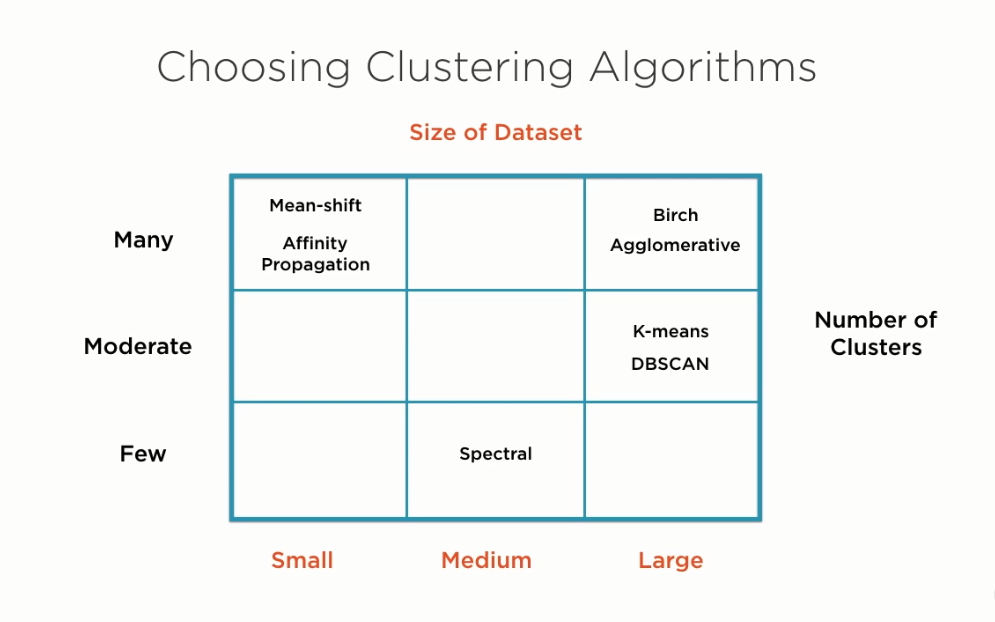

In [182]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

In [202]:
IBM_data = data[['Attrition_Binary','OverTime_Encoded','MonthlyIncome','TotalWorkingYears']]

IBM_data.head()

,Attrition_Binary,OverTime_Encoded,MonthlyIncome,TotalWorkingYears
0,1.0,1.0,5993,8
1,0.0,0.0,5130,10
2,1.0,1.0,2090,7
3,0.0,1.0,2909,8
4,0.0,0.0,3468,6


In [203]:
IBM_data.shape

(1394, 4)

In [204]:
IBM_data = IBM_data.sample(frac=1).reset_index(drop=True)
IBM_data.head()
IBM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 4 columns):
Attrition_Binary     1394 non-null float64
OverTime_Encoded     1394 non-null float64
MonthlyIncome        1394 non-null int64
TotalWorkingYears    1394 non-null int64
dtypes: float64(2), int64(2)
memory usage: 43.6 KB


In [205]:
IBM_data_features = IBM_data.drop('Attrition_Binary', axis=1)
IBM_data_features.head()

,OverTime_Encoded,MonthlyIncome,TotalWorkingYears
0,0.0,2013,15
1,0.0,2439,4
2,1.0,6162,9
3,0.0,2728,2
4,1.0,6796,18


In [206]:
IBM_data_attrition = IBM_data['Attrition_Binary']
IBM_data_attrition.sample(10)

964     0.0
215     0.0
774     0.0
405     0.0
861     0.0
1341    1.0
887     1.0
406     0.0
707     0.0
1303    0.0
Name: Attrition_Binary, dtype: float64

### Evaluation Metrics
##### Homogeneity Score
    Clustering satisfies homogeneity if all of its clusters contains only points which are members of a single class.
    The actual label values do not matter i.e the fact that actual label 1 corresponds to cluster label 2 does
    not affect this score
##### Completeness Score
    Clustering satisfies completeness if all the points that are members of the same class belong to the same cluster
##### V Measure Score
    Harmonic mean of homogeneity and completeness score - usually used to find the avarage of rates
##### Adjusted Rand Score
    Similarity measure between clusters which is adjusted for chance i.e random labeling of data points
    Close to 0: data was randomly labeled
    Exact 1: actual and predicted clusters are identical 
##### Adjusted Mutual Information Score
    Information obtained about one random variable by observing another random variable adjusted to account for chance
    Close to 0: data was randomly labeled
    Exact 1: actual and predicted clusters are identical
##### Silhouette Score
    Uses a distance metric to measure how similar a point is to its own cluster and how dissimilar the point is from
    points in other clusters. Ranges between -1 and 1 and positive values closer to 1 indicate that the clustering
    was good


In [207]:
def BuildModel(clustering_model,data,labels):
    model=clustering_model(data)
    print('homo\tcompl\tv-means\tARI\tAMI\tsilhouette')
    print(50*'_')
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
         %(metrics.homogeneity_score(labels, model.labels_),
           metrics.completeness_score(labels, model.labels_),
           metrics.v_measure_score(labels, model.labels_),
           metrics.adjusted_rand_score(labels, model.labels_),
           metrics.adjusted_mutual_info_score(labels, model.labels_),
           metrics.silhouette_score(data,model.labels_)))

#### K-Means Clustering
    To process the learning data, the K-means algorithm in data mining starts with a first group of randomly
    selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) 
    calculations to optimize the positions of the centroids.It halts creating and optimizing clusters when either:
    The centroids have stabilized — there is no change in their values because the clustering has been successful.
    The defined number of iterations has been achieved.
    
    
### Contrasting K-Means and Hierarchical Clustering
##### K-Means
    * Need distance measure as well as way to aggregate points in a cluster
    * Must represent data as vectors in N-dimensional hyperspace
    * Data representation can be difficult for complex data types
    * Variants can efficiently deal with very large datasets on disk
##### Hierarchical
    * Only need distance measure; do not need way to combine points in cluster
    * No need to express data as vectors in N-dimensional hyperspace
    * Relatively simple to represent even complex documents
    * Even with careful construction too computationaly expensive for large datasets on disk

In [208]:
def k_means(data,n_clusters=2, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [209]:
BuildModel(k_means,IBM_data_features,IBM_data_attrition)

homo	compl	v-means	ARI	AMI	silhouette
__________________________________________________
0.006	0.006	0.006	-0.038	0.005	0.698


#### According to scores our k-means cluster perform did not well. Let's try other algorithms and hope an accuracy improvement